### Supervised Learning

We use Linear Regression when we have a continuous (quantitative) target variable (Regression problem).

We use Logistic Regression when we have a discrete (qualitative, categorical) target variable (Classification problem).


<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523361626/linear_vs_logistic_regression_h8voek.jpg">


<img src = "https://qph.fs.quoracdn.net/main-qimg-8fed0d0d6b8ac4f90e6f3d14bca8ed20">


<img src="https://assets.website-files.com/5cc74fa87e7513b0c52acc95/5cc7604a671396f4dab030a1_v7jVB_tJO9Vs8yc8dZRW4ZGrs2ujWhbjrJV_AMM_A1GT_GJMmhVVtT2nGM9fmZae_7e4kUzIzI-diTVVR2BxSdnEfO5LE_qNoMMJJj0Vc_BwwXbo4Ug8Qt5bm9nQqMNLm_NP8W2d.png">

### Revisit the Linear Regression error (cost) function
<img src = "https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548702778023.png">

<img src ="https://miro.medium.com/max/1460/1*RPe5bfzf_HTtuyAL_ZG3yw.png">

### Logistic Regression with OLS as error(cost) function

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20190424185211/Cost_func_Non_Convex.jpg">

### Cross-Entropy as error(cost) function for Logistic Regression
<img src="https://i.stack.imgur.com/HlYNr.png">


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTsVJGunCOythbeX_MxNSEAAqVjCdYUThplVA&usqp=CAU">

### Import packages (libraries)

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Data downloaded from Kaggle 
https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



In [4]:
diab_df = pd.read_csv("diabetes.csv")

### Show first few rows

In [5]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Features and Target

In [6]:
X = diab_df.iloc[:,0:-1] 
y = diab_df.Outcome 

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Split the data into train and test

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Instantiate, preprocess, train, and predict (test)

In [9]:

LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [18]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )




Classes [0 1]
Intercept [-0.8106916]
Coefficients [[ 0.29286006  1.03288106 -0.20519002  0.09191431 -0.11308546  0.68771364
   0.29190585  0.26366929]]


In [20]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8020833333333334
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



### Confusion Matrix

<img src = "https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png">

In [21]:


conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Predicted label')

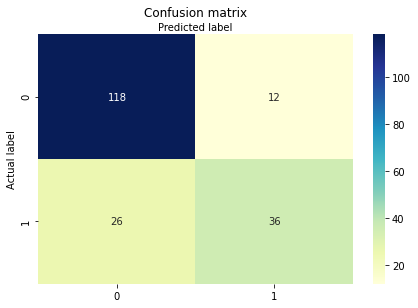

In [22]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Definitions 

<img src="https://i.ytimg.com/vi/BI_OWaOu4Qk/maxresdefault.jpg">

Precision is the proportion of the predicted positives that are true (actual)  positives. It is also called Positive Predictive Rate <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d854b1544fc77735d575ce0d30e34d7f1eacf707">

Recall is the proportion of the true (actual) positives that are predicted as positives. It is also called True Positive Rate <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f02ea353bf60bfdd9557d2c98fe18c34cd8db835">

True Negative Rate 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8f2c867f0641e498ec8a59de63697a3a45d66b07">

False Positive Rate 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/422d06161964ca90602ec8712cd211cb0d80da19">

### Trade-off between false positives and false negatives

The output of the sigmoid function is a probabilty (a number between 0 and 1).
How do we decide whether y=1 (positive) or y=0 (negative)?
We can set the threshold to 0.5 and decide as follows:
If P(y) >= 0.5, it is y=1 (positive), otherwise y=0 (negative).
If we set the threshsold to 0.7, we may decrease the false positives and increase the false negatives.
If we set the threshsold to 0.3, we may decrease the false negatives and increase the false positives.

This is a decision-making problem. It is informed by the use case.

If it is a sociotechnical use case, it is an ethical question.

1. Suppose we are conducting a medical lab test for a disease (e.g., cancer). A false negative means telling a sick person that they are healthy. This could be deadly. If it comes to a trade-off, we want low false negatives and high false positives.

2. If a government of a country wants to access the personal data of its citizens because of national security, then a false positive means accessing the personal data of innocent citizens. A privacy advocate or human rights group would have low false positives and high false negatives, if it comes to a trade-off.

### Dummy Classifier

If there is class imbalance in the data, the accuracy measure may not be the best. Suppose you have a data with 99% negative class (y=0) and 1% positive class (y=1). Then a dummy algorithm that uses the most frequesnt as a predictor will always choose y=0. The accuracy is 99%. However, we are interested to find the positive cases. For example, a disease affects 1% of the population. 

In [1]:
# Dummy classifier in SKlearn
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

### F1 Score
What is the mean (average) of A and B? You may say (A+B)/2. That is called the arithmetic mean. There are also the harmonic mean and the geometric mean  [Pythagorean means](https://en.wikipedia.org/wiki/Pythagorean_means)

The F1 score is a measure of accuracy; it is the harmonic mean of the precision and recall <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9c94f59b68f5ae0dc92185906c7ec4214fd04e1e">

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


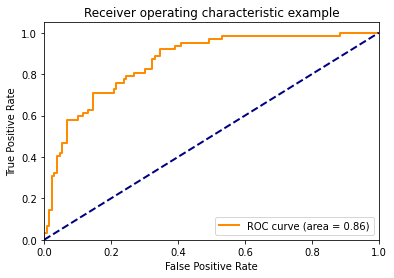

In [32]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
